# Wave Equation

## Name: Jane Slagle

## Class: Vol 4 lab

## Date: 11/9/22

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.linalg import toeplitz
import scipy.optimize

# Problem 1
Numerically approximate the solution to the following BVP

$$
u_{tt} = u_{xx} \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = \sin(2\pi x), \\
u_t(x,0) = 0. 
$$

Numerically approximate the solution $u(x,t)$ for $t\in[0,.5]$. Use $J=50$ subintervals in the $x$ dimension and $M=50$ subintervals in the $t$ dimension. Animate the results. Compare you results with the analytic solution $u(x,t) = \sin(2\pi x)\cos(2\pi t).$ This function is know as a standing wave.

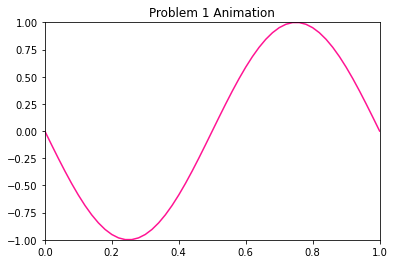

In [52]:
#make it into function bc will call it in next problems:
#from our system: see that s = 1

def prob_1(J, M, T, f, g, s=1):
    #first find A matrix: need del_t, del_x for lambda so find lambda 1st
    t = np.linspace(0,T,M+1)  #t goes from 0 to 0.5 and want 50 M subintervals
    del_t = t[1] - t[0]       #del_t is the change btw each t value
    x = np.linspace(0,1,J+1)  #from BVP given: x goes from 0 to 1
    del_x = x[1] - x[0]    
    lam = (s*del_t)/(del_x) 
    
    #add the main, above and below diagonals to get A matrix:
    A = np.diag((lam**2)*np.ones(J-2), -1) +  np.diag(2*(1-lam**2)*np.ones(J-1), 0) +  np.diag((lam**2)*np.ones(J-2), 1)    #make a matrix of zeros J+1 by M+1, make sure to not change the first and last entries of each column b/c we want them to be 0
    
    #start contstructing U:
    U = np.zeros((M+1, J+1))  #U is 2 dimensional: have u(x,t) so have U[m,j] here
    #get the 1st, 2nd values of U for when do recursive formula for U:
    U0 = f(x[1:-1])  #endpts are both 0 so don't include them here to keep them as zeros
    U[0][1:-1] = U0 
    U1 = [U[0,j] + g(x)[j]*del_t + ((lam**2)/2)*(U[0,j-1] - 2*U[0,j] + U[0,j+1]) for j in range(1,J)]
    U[1][1:-1] = U1 
    
    #now can get U via the recursive formula have: 1st, last are 0s so dont need change those
    for m in range(2, M+1):   
        U[m][1:-1] = A@U[m-1][1:-1] - U[m-2][1:-1]    
        
    return U

#set up system that we are given:
J = 50
M = 50
T = .5
s = 1
x = np.linspace(0,1,J+1)
f = lambda x: np.sin(2*np.pi*x)
g = lambda x: np.zeros(len(x))
u_found = prob_1(J,M,T,f,g,s)

#now create animation:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1)) 
ax.set_ylim((-1,1))
sol, = plt.plot([],[], color='deeppink')

def update(i):
    sol.set_data(x,list(u_found[i]))  #plot the u that we found in prob_1 code
    return sol

ani = animation.FuncAnimation(fig, update, frames=range(M+1), interval=50)
plt.title('Problem 1 Animation')
animation.writer = animation.writers['ffmpeg']
ani.save('probl1_ani.mp4')

plt.show()

#dipslay the video from the file now
<video src="prob1_ani.mp4" controls>

# Problem 2

Consider the boundary value problem 

$$
u_{tt} = u_{xx}, \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = 0.2e^{-,^2(x-1/2)^2} \\
y_t(x,0) = 0.4m^2(x-\frac{1}{2})e^{-m^2(x-1/2)^2}.
$$

The solution of this problem is ta Gaussian pulse. It travels to the right at a constant speed. This solution models, for example, a wave pulse in a stretched string. Note that the fixed boundart conditions reflect the pulse back when it meets the boundary.

Numerically approximate the solution $u(x,t)$ for $t\in[0,1]$. Set $m=20$. Use 200 subintervals in space and 220 in time, and animate your results. Then use 200 subintervals in space and 180 in time, and animate your results. Note that the stability condition is not satisfied for the second mesh.

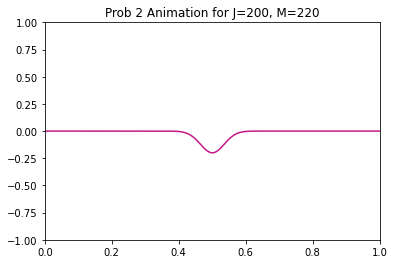

In [53]:
#we are calling prob 1 here:
#get everything for system we want to animate:
J = 200
M = 220
T = 1
s = 1
m = 20
f = lambda x: 0.2*np.exp((-m**2)*((x-1/2)**2))
g = lambda x: 0.4*(m**2)*(x-1/2)*np.exp(-(m**2)*((x-1/2)**2))
u_found = prob_1(J,M,T,f,g,s)
x = np.linspace(0, 1, J+1)

#now animate it:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
traj, = plt.plot([],[], color='mediumvioletred')    
plt.title("Prob 2 Animation for J=200, M=220")

def update(i):
    traj.set_data(x,list(u_found[i])) #only want y as t changes
    return traj

#now create the actual animation:
ani = animation.FuncAnimation(fig, update, frames=range(M+1), interval=50)  #create FuncAnimation object to make animation
animation.writer = animation.writers['ffmpeg'] #specify using ffmpeg
ani.save('prob2_ani_1.mp4') #save animation as file

plt.show()

#dipslay the video from the file now
<video src="prob2_ani_1.mp4" controls>

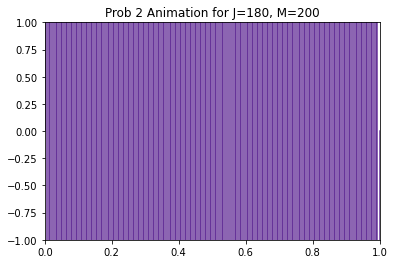

In [54]:
#want for J = 200, M = 180 now:
J2 = 200
M2 = 180
T = 1
s = 1
m = 20
f = lambda x: 0.2*np.exp((-m**2)*((x-1/2)**2))
g = lambda x: 0.4*(m**2)*(x-1/2)*np.exp(-(m**2)*((x-1/2)**2))
u_found2 = prob_1(J2,M2,T,f,g,s)
x = np.linspace(0, 1, J2+1)

#now animate it:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
traj, = plt.plot([],[], color='rebeccapurple')    
plt.title("Prob 2 Animation for J=180, M=200")

def update(i):
    traj.set_data(x,list(u_found2[i])) #only want y as t changes
    return traj

#now create the actual animation:
ani = animation.FuncAnimation(fig, update, frames=range(M2+1), interval=50)  #create FuncAnimation object to make animation
animation.writer = animation.writers['ffmpeg'] #specify using ffmpeg
ani.save('prob2_ani_2.mp4') #save animation as file

plt.show()

#dipslay the video from the file now
<video src="prob2_ani_2.mp4" controls>

# Problem 3

Consider the initial boundary value problem
$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = 0.2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) = 0.
$$
The initial condition separates into two smaller, slower-moving pulses, one travelling to the right and the other to the left.
This solution models, for example, a plucked guitar string

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,2\right]$.
Set $m=20$.
Use 200 subintervals in space and 440 in time, and animate your results.
It is rather easy to see that the solution to this problem is the sum of two travelling waves, one travelling to the left and the other to the right, as described earlier.

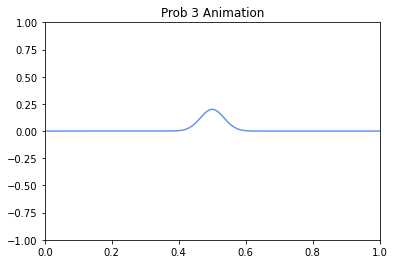

In [55]:
J = 200
M = 440
T = 2
s = 1
m = 20
f = lambda x: 0.2*np.exp((-m**2)*((x-1/2)**2))
g = lambda x: np.zeros(len(x))
u_found = prob_1(J,M,T,f,g,s)
x = np.linspace(0, 1, J+1)

#now animate it:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
traj, = plt.plot([],[], color='cornflowerblue')    
plt.title("Prob 3 Animation")

def update(i):
    traj.set_data(x,list(u_found[i])) #only want y as t changes
    return traj

#now create the actual animation:
ani = animation.FuncAnimation(fig, update, frames=range(M+1), interval=50)  #create FuncAnimation object to make animation
animation.writer = animation.writers['ffmpeg'] #specify using ffmpeg
ani.save('prob3_ani.mp4') #save animation as file

plt.show()

#dipslay the video from the file now
<video src="prob3_ani.mp4" controls>

# Problem 4

Consider the initial boundary value problem

$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = \begin{cases} 1/3 & \text{if } 5/11 < x < 6/11,\\
	0 & \text{otherwise}
	\end{cases}\\
	u_t(x,0) = 0.
$$

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 2\right]$.
Use 200 subintervals in space and 440 in time, and animate your results.
Even though the method is second order and stable for this discretization, since the initial condition is discontinuous there are large dispersive errors.

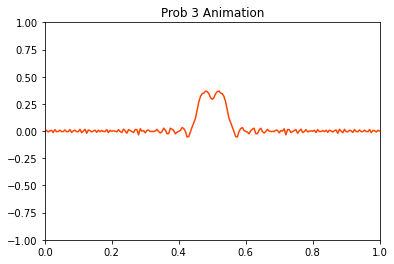

In [56]:
J = 200
M = 440
T = 2
s = 1
f = lambda x: [1/3 if (5/11 < x_ and x_ < 6/11) else 0 for x_ in x] #f is piecewise here
g = lambda x: np.zeros(len(x))
u_found = prob_1(J,M,T,f,g,s)
x = np.linspace(0, 1, J+1)

#now animate it:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-1,1))
traj, = plt.plot([],[], color='orangered')    
plt.title("Prob 3 Animation")

def update(i):
    traj.set_data(x,list(u_found[i])) #only want y as t changes
    return traj

#now create the actual animation:
ani = animation.FuncAnimation(fig, update, frames=range(M+1), interval=50)  #create FuncAnimation object to make animation
animation.writer = animation.writers['ffmpeg'] #specify using ffmpeg
ani.save('prob4_ani.mp4') #save animation as file

plt.show()

#dipslay the video from the file now
<video src="prob4_ani.mp4" controls>

# Problem 5


Numerically solve the initial value problem

$$
	u_t -su_x + uu_x = u_{xx}, \quad x \in (-\infty,\infty),\\
	u(x,0) = v(x),
$$

for $t \in [0,1]$.
Let the perturbation $v(x)$ be given by

$$
v(x) = 3.5(\sin{(3x)} + 1)\frac{1}{\sqrt{2\pi}} \exp{(-x^2/2)}
$$

And let the initial condition be $u(x, 0) = \hat{u}(x) + v(x)$
Approximate the $x$ domain,$(-\infty, \infty)$, numerically by the finite interval $[-20,20]$, and fix $u(-20) = u_-$, $u(20) = u_+$. Let $u_- = 5$, $u_+ = 1$.
Use 150 intervals in space and 350 steps in time.
Animate your results.
You should see the solution converge to a translate of the travelling wave $\hat{u}$.

Hint: This difference scheme is no longer a linear equation.
We have a nonlinear equation in $U^{n+1}$.
We can still solve this function using Newton's method or some other similar solver.
In this case, use `scipy.optimize.fsolve`.